# Connect to data owner via the duet server

In [1]:
import syft as sy

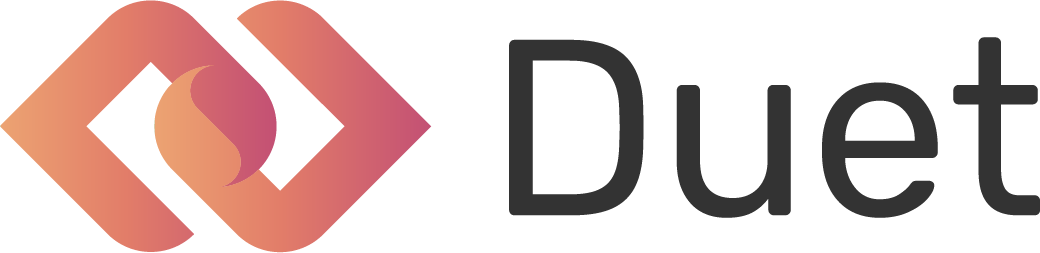

🎤  🎸  ♪♪♪ Joining Duet ♫♫♫  🎻  🎹

♫♫♫ > DISCLAIMER: Duet is an experimental feature currently in beta.
♫♫♫ > Use at your own risk.


    > ❤️ Love Duet? Please consider supporting our community!
    > https://github.com/sponsors/OpenMined

♫♫♫ > Punching through firewall to OpenGrid Network Node at:
♫♫♫ > http://ec2-18-218-7-180.us-east-2.compute.amazonaws.com:5000
♫♫♫ >
♫♫♫ > ...waiting for response from OpenGrid Network... 
♫♫♫ > DONE!

♫♫♫ > STEP 1: Send the following Duet Client ID to your duet partner!
♫♫♫ > Duet Client ID: 50981613757412472e6abf1fb0d7bc8d

♫♫♫ > ...waiting for partner to connect...


/Users/davebuckley/miniconda3/envs/openmined-courses/lib/python3.9/site-packages/aiortc/rtcdtlstransport.py:211: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  _openssl_assert(lib.SSL_CTX_use_certificate(ctx, self._cert._x509) == 1)  # type: ignore
/Users/davebuckley/miniconda3/envs/openmined-courses/lib/python3.9/site-packages/aiortc/rtcdtlstransport.py:186: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  value=certificate_digest(self._cert._x509),  # type: ignore



♫♫♫ > CONNECTED!


In [2]:
duet = sy.duet("d9c7ac31e11ad432fd79c36a97dc5e44")

In [3]:
duet

<Duet: <UID: c1031d0af6844a9bab1f5b42f2c4978d>>

# Search for available data

In [5]:
# see what data is available
duet.store.pandas

,ID,Tags,Description,object_type
0,<UID: b2ebbf11dadc4b07a4e70faa0f109e6e>,[ages],List of ages of 6 people,<class 'torch.Tensor'>


In [6]:
data_ptr = duet.store['ages']
# Could also do duet.store[0]

In [8]:
print(data_ptr)

In [9]:
av_age = data_ptr.float().mean()

In [10]:
try:
    av_age.get()
except Exception as e:
    print(e)

[2022-09-25T15:34:18.445474+0100][CRITICAL][logger]][30697] You do not have permission to .get() Object with ID: <UID: 69f529adc9434432b7b28e7b6658e171>Please submit a request.


You do not have permission to .get() Object with ID: <UID: 69f529adc9434432b7b28e7b6658e171>Please submit a request.


In [13]:
av_age.request(reason="go oooon")

In [14]:
av_age.request(reason="I am a data scientist and need to know this average for my analysis")

In [15]:
duet.requests.pandas

,Requested Object's tags,Reason,Request ID,Requested Object's ID,Requested Object's type
0,"[ages, float, mean]",I am a data scientist and need to know this av...,<UID: 2e3375db890445d2a389b6f1db248e09>,<UID: 69f529adc9434432b7b28e7b6658e171>,


In [16]:
avg = av_age.get()
print(avg)

tensor(46.8333)


# Try some other ops

In [17]:
duet.torch # shows all the functions that can be used

Module:
	.Tensor -> <syft.ast.klass.Class object at 0x127f92dc0>
	.BFloat16Tensor -> <syft.ast.klass.Class object at 0x127f92e20>
	.BoolTensor -> <syft.ast.klass.Class object at 0x127f92e80>
	.ByteTensor -> <syft.ast.klass.Class object at 0x127f92ee0>
	.CharTensor -> <syft.ast.klass.Class object at 0x127f92f40>
	.DoubleTensor -> <syft.ast.klass.Class object at 0x127f92fa0>
	.FloatTensor -> <syft.ast.klass.Class object at 0x127fc6040>
	.HalfTensor -> <syft.ast.klass.Class object at 0x127fc60a0>
	.IntTensor -> <syft.ast.klass.Class object at 0x127fc6100>
	.LongTensor -> <syft.ast.klass.Class object at 0x127fc6160>
	.ShortTensor -> <syft.ast.klass.Class object at 0x127fc61c0>
	.nn -> Module:
		.Parameter -> <syft.ast.klass.Class object at 0x127fc62e0>
		.Module -> <syft.ast.klass.Class object at 0x12805c700>
		.Conv2d -> <syft.ast.klass.Class object at 0x12805cb80>
		.Dropout2d -> <syft.ast.klass.Class object at 0x12805cfa0>
		.Linear -> <syft.ast.klass.Class object at 0x128061340>
		.fun

In [18]:
max_age_ptr = data_ptr.float().amax()
min_age_ptr = data_ptr.float().amin()

In [21]:
max_age_result = max_age_ptr.get(
    request_block = True,
#     name="result_download",
    reason="download the maximum age"
)

print(max_age_result)

tensor(88.)


In [22]:
min_age_result = min_age_ptr.get(
    request_block = True,
#     name="result_download",
    reason="download the minimum age"
)

print(min_age_result)

tensor(22.)


# Cheating

In [24]:
# This setup is primitive, as you essentially now have permissions to download anything
# Including the original data!

age_data = data_ptr.get(request_block=True, delete_obj=False)
print(age_data)

tensor([25, 32, 49, 65, 88, 22])
